<a href="https://colab.research.google.com/github/M-Borsuk/GameSalesAnalysis/blob/main/VideoGamesSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

# **Download the dataset here!**

https://www.kaggle.com/gregorut/videogamesales

# **General imports**

In [2]:
########### Basic modules for data manipulation ##################
import numpy as np
import pandas as pd
########## Data visualization modules ############################
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud,STOPWORDS
######### Warnings deprecation ####################################
import warnings
######### Statistical modules #####################################
from scipy.stats import yeojohnson

In [3]:
warnings.filterwarnings("ignore")

In [4]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [5]:
#For the jupyterLab
#pio.renderers.default = "notebook_connected"
#For google colab
#pio.renderers.default = "colab"

In [6]:
sns.set("paper","ticks")
sns.color_palette("tab10")
rcParams['figure.figsize'] = 16,8

In [7]:
df = pd.read_csv("/content/drive/My Drive/vgsales.csv")

In [8]:
df.head()

Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37

[5 rows x 11 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df.describe()

Rank          Year  ...   Other_Sales  Global_Sales
count  16598.000000  16327.000000  ...  16598.000000  16598.000000
mean    8300.605254   2006.406443  ...      0.048063      0.537441
std     4791.853933      5.828981  ...      0.188588      1.555028
min        1.000000   1980.000000  ...      0.000000      0.010000
25%     4151.250000   2003.000000  ...      0.000000      0.060000
50%     8300.500000   2007.000000  ...      0.010000      0.170000
75%    12449.750000   2010.000000  ...      0.040000      0.470000
max    16600.000000   2020.000000  ...     10.570000     82.740000

[8 rows x 7 columns]

In [11]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# **Basic data cleaning**

In [12]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [13]:
df[df["Publisher"].isna() == True]

Rank  ... Global_Sales
470      471  ...         3.00
1303    1305  ...         1.46
1662    1664  ...         1.21
2222    2224  ...         0.93
3159    3161  ...         0.64
3166    3168  ...         0.64
3766    3768  ...         0.53
4145    4147  ...         0.48
4526    4528  ...         0.43
4635    4637  ...         0.42
5302    5304  ...         0.35
5647    5649  ...         0.32
6272    6274  ...         0.27
6437    6439  ...         0.27
6562    6564  ...         0.26
6648    6650  ...         0.25
6849    6851  ...         0.24
7208    7210  ...         0.22
7351    7353  ...         0.21
7470    7472  ...         0.21
7953    7955  ...         0.19
8330    8332  ...         0.17
8341    8343  ...         0.17
8368    8370  ...         0.17
8503    8505  ...         0.16
8770    8772  ...         0.15
8848    8850  ...         0.15
8896    8898  ...         0.15
9517    9519  ...         0.13
9749    9751  ...         0.12
10382  10384  ...         0.11
10494  10496  ...         0.10
11076  11078  ...         0.09
11526  11528  ...         0.08
12487  12489  ...         0.06
12517  12519  ...         0.06
13278  13280  ...         0.05
13672  13674  ...         0.04
13962  13964  ...         0.04
14087  14089  ...         0.04
14296  14299  ...         0.03
14311  14314  ...         0.03
14698  14701  ...         0.03
14942  14945  ...         0.02
15056  15059  ...         0.02
15261  15264  ...         0.02
15325  15328  ...         0.02
15353  15356  ...         0.02
15788  15791  ...         0.02
15915  15918  ...         0.02
16191  16194  ...         0.01
16198  16201  ...         0.01
16208  16211  ...         0.01
16229  16232  ...         0.01
16367  16370  ...         0.01
16494  16497  ...         0.01
16543  16546  ...         0.01
16553  16556  ...         0.01

[58 rows x 11 columns]

In [14]:
print("Amount of missing values in the publisher column {}".format(df[df["Publisher"].isna() == True].shape[0]))

Amount of missing values in the publisher column 58


In [15]:
df[df["Year"].isna() == True]

Rank                         Name  ... Other_Sales  Global_Sales
179      180              Madden NFL 2004  ...        0.71          5.23
377      378             FIFA Soccer 2004  ...        0.51          3.49
431      432   LEGO Batman: The Videogame  ...        0.29          3.17
470      471   wwe Smackdown vs. Raw 2006  ...        0.41          3.00
607      608               Space Invaders  ...        0.03          2.53
...      ...                          ...  ...         ...           ...
16307  16310                Freaky Flyers  ...        0.00          0.01
16327  16330                    Inversion  ...        0.00          0.01
16366  16369  Hakuouki: Shinsengumi Kitan  ...        0.00          0.01
16427  16430                 Virtua Quest  ...        0.00          0.01
16493  16496                   The Smurfs  ...        0.00          0.01

[271 rows x 11 columns]

In [16]:
print("Amount of missing values in the year column {}".format(df[df["Year"].isna() == True].shape[0]))

Amount of missing values in the year column 271


In [17]:
def checker(x):
  for i in x.split(" "):
    if i in [str(i) for i in range(1980,2021)]:
      return True
  return False

In [18]:
df["nums_in_name"] = df["Name"].apply(lambda x: 1 if checker(x) == True else 0)

In [19]:
df[(df["Year"].isna() == True) & (df["nums_in_name"] == 1)]

Rank                               Name  ... Global_Sales  nums_in_name
179      180                    Madden NFL 2004  ...         5.23             1
377      378                   FIFA Soccer 2004  ...         3.49             1
470      471         wwe Smackdown vs. Raw 2006  ...         3.00             1
1649    1651                NASCAR Thunder 2003  ...         1.22             1
3501    3503                    Madden NFL 2002  ...         0.58             1
4797    4799                   NFL GameDay 2003  ...         0.40             1
5162    5164                      NBA Live 2003  ...         0.36             1
5669    5671             All-Star Baseball 2005  ...         0.32             1
5901    5903                      NBA Live 2003  ...         0.30             1
8929    8931             All-Star Baseball 2005  ...         0.15             1
12922  12924                Tour de France 2011  ...         0.05             1
13870  13872                    Sega Rally 2006  ...         0.04             1
15739  15742              Football Manager 2007  ...         0.02             1
15865  15868  PDC World Championship Darts 2008  ...         0.02             1
16057  16060  PDC World Championship Darts 2008  ...         0.01             1

[15 rows x 12 columns]

In [20]:
df.iloc[df[(df["Year"].isna() == True) & (df["nums_in_name"] == 1)]["Year"].index,3] = df[(df["Year"].isna() == True) & (df["nums_in_name"] == 1)]["Name"].apply(lambda x: int(x.split(" ")[-1])).values

In [21]:
print("Amount of missing values in the year column after first step of imputing: {}".format(df[df["Year"].isna() == True].shape[0]))

Amount of missing values in the year column after first step of imputing: 256


In [22]:
df.drop(columns=["nums_in_name","Rank"],inplace=True)

In [23]:
df = df.fillna(value={"Publisher": "Unknown"})

In [24]:
print("Amount of missing values in the publisher column: {}".format(df[df["Publisher"].isna() == True].shape[0]))

Amount of missing values in the publisher column: 0


In [25]:
df = df.dropna()

In [26]:
df.isna().any()

Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [27]:
df.drop(df[df["Year"] > 2016].index,inplace=True)

In [28]:
df["Year"] = df["Year"].astype('int64')

**Exploratory Data Analysis**
===

In [29]:
def create_grouped_df(df,*g,func='mean'):
  return df.groupby([x for x in g]).sum().reset_index() if func == "sum" else\
  df.groupby([x for x in g]).mean().reset_index() if func == 'mean' else\
  df.groupby([x for x in g]).count().reset_index()

In [30]:
def plot_wc(text,mw = 20):
  wordcloud = WordCloud(max_words=mw).generate(text)
  plt.subplots(figsize=(15, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

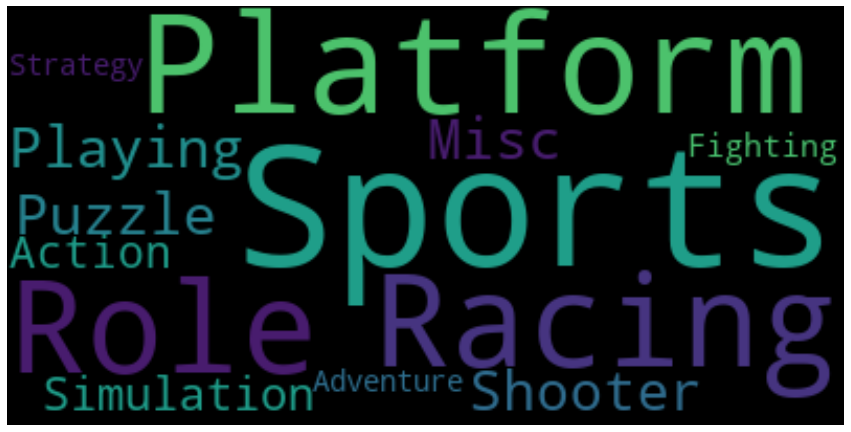

In [31]:
plot_wc(" ".join(df["Genre"].unique()),mw=76)

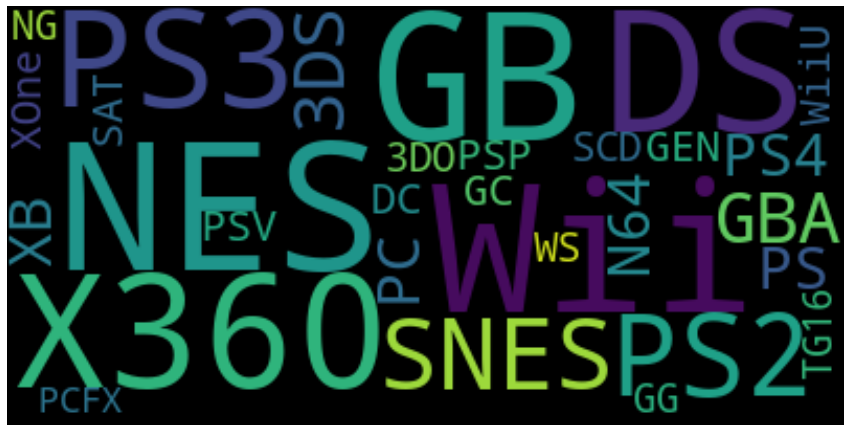

In [32]:
plot_wc(" ".join(df["Platform"].unique()),mw=76)

In [33]:
t=df.sort_values("Global_Sales",ascending=False)[["Name","Global_Sales"]].head()
t.columns = ["Names of the 5 best selling games","Global sales in millions"]
t

Names of the 5 best selling games  Global sales in millions
0                        Wii Sports                     82.74
1                 Super Mario Bros.                     40.24
2                    Mario Kart Wii                     35.82
3                 Wii Sports Resort                     33.00
4          Pokemon Red/Pokemon Blue                     31.37

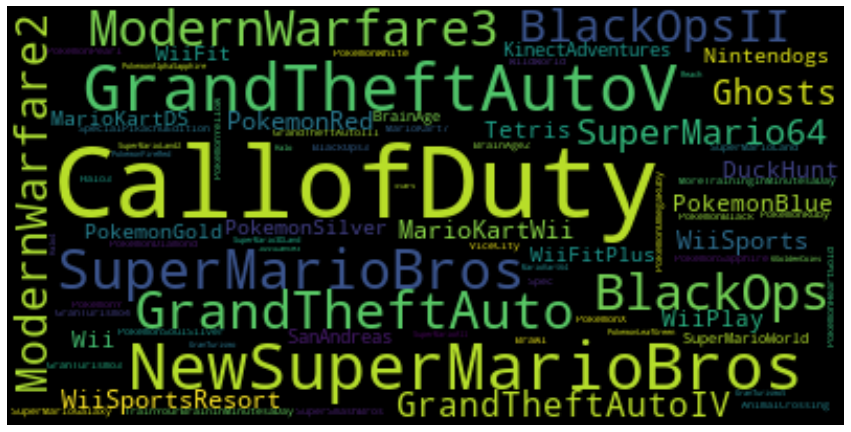

In [34]:
plot_wc(" ".join([x.replace(" ","") for x in df.sort_values("Global_Sales",ascending=False)["Name"].values[:70]]),mw=76)

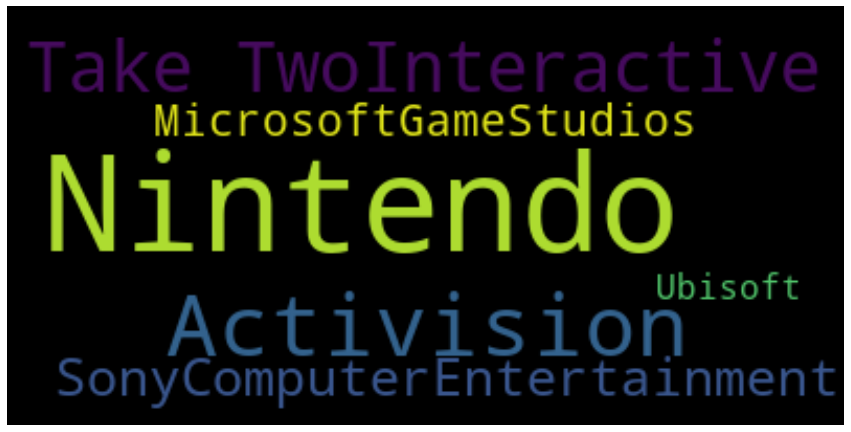

In [35]:
plot_wc(" ".join([x.replace(" ","") for x in df.sort_values("Global_Sales",ascending=False)["Publisher"].values[:70]]),mw=76)

In [36]:
t=create_grouped_df(df,"Platform",func="sum")[["Platform","Global_Sales"]].sort_values("Global_Sales",ascending=False)["Platform"].head()
t.columns = ["5 platforms for best selling games","Global sales in millions"]
t

16     PS2
28    X360
17     PS3
26     Wii
4       DS
Name: Platform, dtype: object

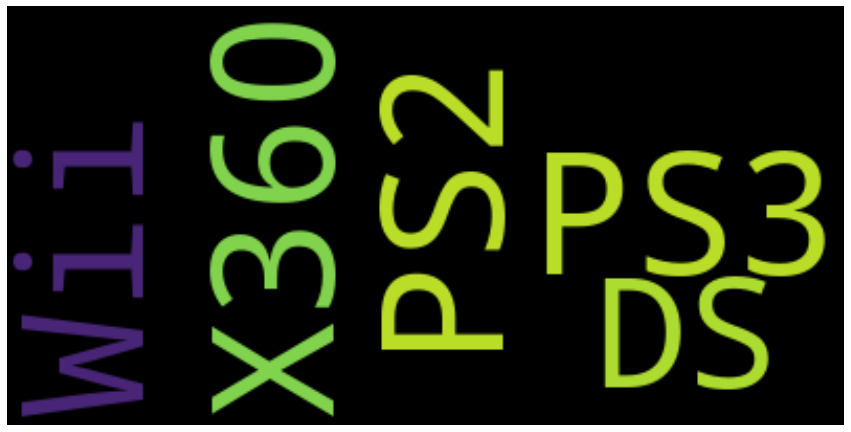

In [37]:
plot_wc(" ".join(create_grouped_df(df,"Platform",func="sum")[["Platform","Global_Sales"]].sort_values("Global_Sales",ascending=False)["Platform"].values[:5]))

In [38]:
t=create_grouped_df(df,"Platform",func="count")[["Platform","Global_Sales"]].sort_values("Global_Sales",ascending=False).head()
t.columns = ["5 platforms with the biggest amount of games released","Amount of released games"]
t

5 platforms with the biggest amount of games released  Amount of released games
16                                                PS2                         2134
4                                                  DS                         2133
17                                                PS3                         1304
26                                                Wii                         1290
28                                               X360                         1237

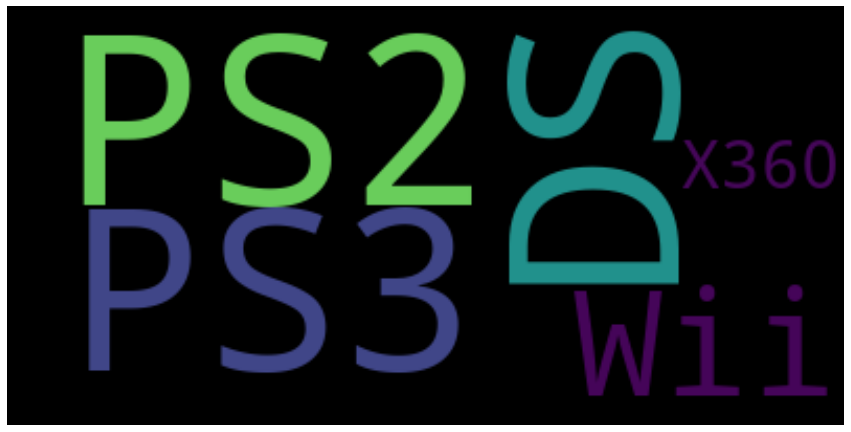

In [39]:
plot_wc(" ".join(create_grouped_df(df,"Platform",func="count")[["Platform","Global_Sales"]].sort_values("Global_Sales",ascending=False)["Platform"].values[:5]))

In [40]:
t=create_grouped_df(df,"Genre",func="sum")[["Genre","Global_Sales"]].sort_values("Global_Sales",ascending=False).head()
t.columns = ["5 best selling genre of games","Global sales in millions"]
t

5 best selling genre of games  Global sales in millions
0                         Action                   1722.87
10                        Sports                   1320.12
8                        Shooter                   1026.20
7                   Role-Playing                    923.80
4                       Platform                    829.15

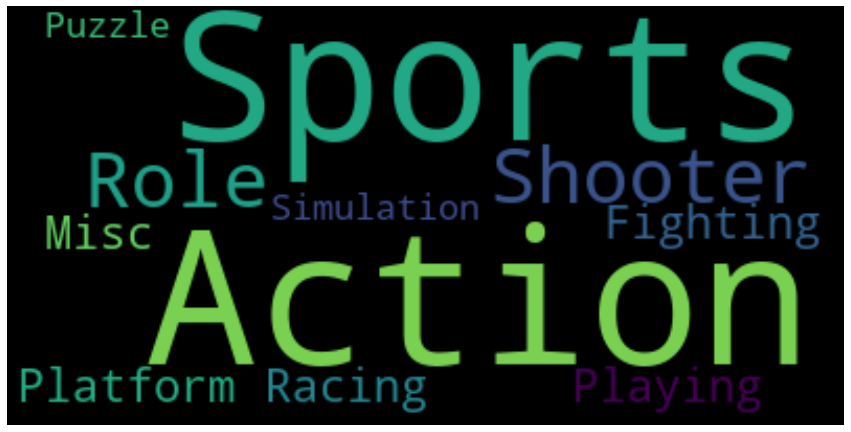

In [41]:
plot_wc(" ".join(create_grouped_df(df,"Genre",func="sum")[["Genre","Global_Sales"]].sort_values("Global_Sales",ascending=False)["Genre"].values[:10]))

In [42]:
t=create_grouped_df(df,"Genre",func="count")[["Genre","Global_Sales"]].sort_values("Global_Sales",ascending=False).head()
t.columns = ["5 genres with the biggest amount of games released","Amount of released games"]
t

5 genres with the biggest amount of games released  Amount of released games
0                                              Action                      3252
10                                             Sports                      2315
3                                                Misc                      1710
7                                        Role-Playing                      1469
8                                             Shooter                      1282

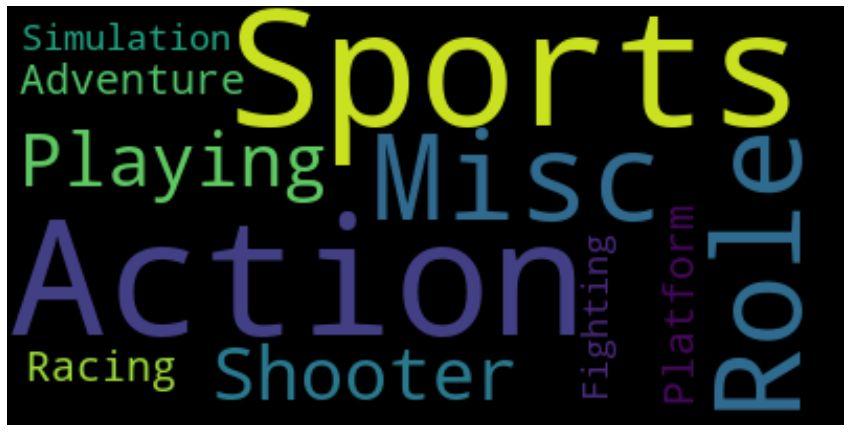

In [43]:
plot_wc(" ".join(create_grouped_df(df,"Genre",func="count")[["Genre","Global_Sales"]].sort_values("Global_Sales",ascending=False)["Genre"].values[:10]))

In [44]:
for gen in df["Genre"].unique():
  t=df[df["Genre"] == gen][["Name","Global_Sales"]].sort_values("Global_Sales",ascending=False).head()
  t.columns = ["Top 5 selling games of all time in {} genre".format(gen),"Sales"]
  print("\n",t,"\n")


    Top 5 selling games of all time in Sports genre  Sales
0                                       Wii Sports  82.74
3                                Wii Sports Resort  33.00
13                                         Wii Fit  22.72
14                                    Wii Fit Plus  22.00
77                                         FIFA 16   8.49 


    Top 5 selling games of all time in Platform genre  Sales
1                                  Super Mario Bros.  40.24
6                              New Super Mario Bros.  30.01
8                          New Super Mario Bros. Wii  28.62
18                                 Super Mario World  20.61
21                                  Super Mario Land  18.14 


    Top 5 selling games of all time in Racing genre  Sales
2                                   Mario Kart Wii  35.82
11                                   Mario Kart DS  23.42
28                          Gran Turismo 3: A-Spec  14.98
42                                    Mario Kart 7

In [45]:
for plat in df["Platform"].unique():
  t=df[df["Platform"] == plat][["Name","Global_Sales"]].sort_values("Global_Sales",ascending=False).head()
  t.columns = ["Top 5 selling games of all time in {}".format(plat),"Sales"]
  print("\n",t,"\n")


   Top 5 selling games of all time in Wii  Sales
0                             Wii Sports  82.74
2                         Mario Kart Wii  35.82
3                      Wii Sports Resort  33.00
7                               Wii Play  29.02
8              New Super Mario Bros. Wii  28.62 


     Top 5 selling games of all time in NES  Sales
1                        Super Mario Bros.  40.24
9                                Duck Hunt  28.31
22                     Super Mario Bros. 3  17.28
96                     Super Mario Bros. 2   7.46
127                    The Legend of Zelda   6.51 


       Top 5 selling games of all time in GB  Sales
4                  Pokemon Red/Pokemon Blue  31.37
5                                    Tetris  30.26
12              Pokemon Gold/Pokemon Silver  23.10
21                         Super Mario Land  18.14
30  Pokémon Yellow: Special Pikachu Edition  14.64 


            Top 5 selling games of all time in DS  Sales
6                          New Super

In [46]:
def plot_countplot(df,x):
  sns.countplot(x=x,data = df)
  plt.title("Distribution of {} values".format(x))
  plt.show()

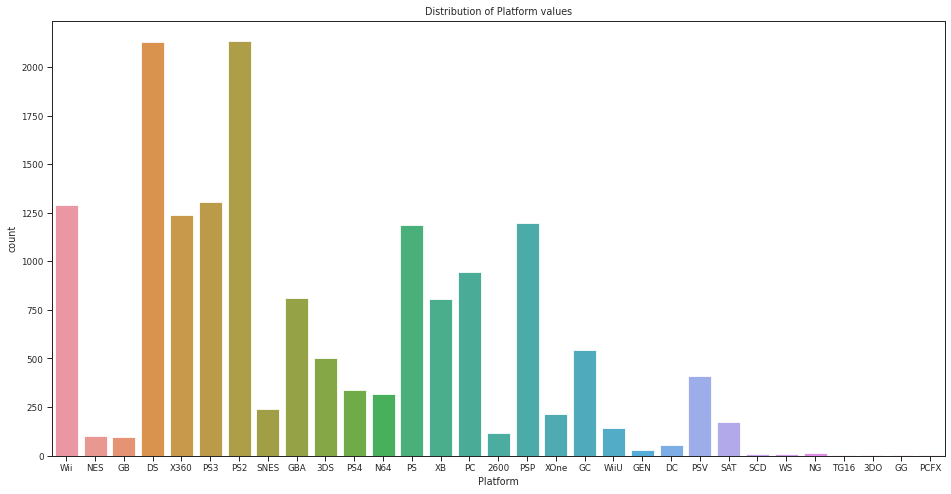

In [47]:
plot_countplot(df,"Platform")

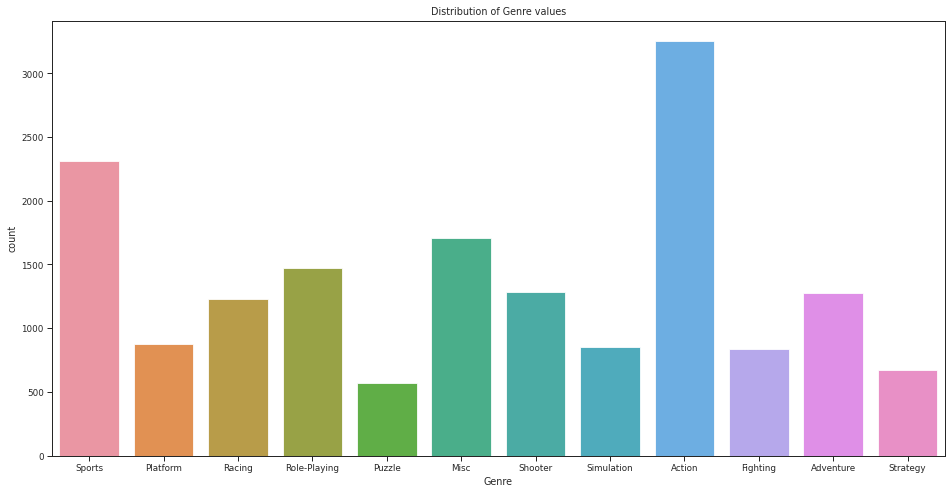

In [48]:
plot_countplot(df,"Genre")

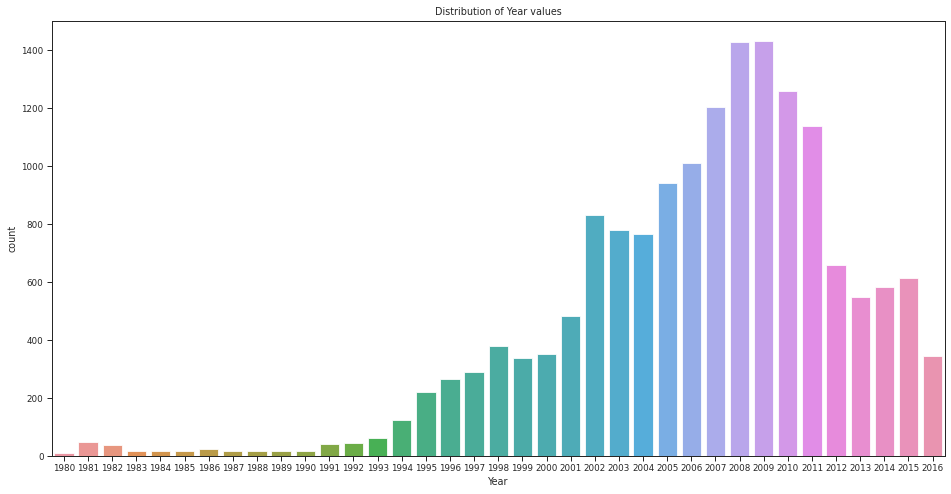

In [49]:
plot_countplot(df,"Year")

In [50]:
def plot_histogram(x0,*x1):
  fig = go.Figure()
  if x1 is not None:
    fig.add_trace(go.Histogram(x=x0,name=x0.name,histnorm='probability'))
    for x in x1:
      fig.add_trace(go.Histogram(x=x,name=x.name,histnorm='probability'))
  else:
    fig.add_trace(go.Histogram(x=x0,histnorm='probability'))
  fig.update_layout(barmode='overlay',title="{}".format(x0.name))
  fig.update_traces(opacity=0.5)
  fig.show()

In [51]:
def plot_boxplot(df,y,x=None):
  if x is not None:
    fig = px.box(df, x=x, y=y,title="{} and {}".format(y,x))
    fig.show()
  else:
    fig = px.box(df, x=x, y=y,title=y)
    fig.show()

In [52]:
plot_histogram(df["Global_Sales"])

In [53]:
plot_boxplot(df,"Global_Sales")

In [54]:
print("{} % of games achieved sales bigger than the Q3 + 1.5*IQR in general".format(np.round((df[df["Global_Sales"] > 1.08].shape[0] / df.shape[0]) * 100,2)))

11.49 % of games achieved sales bigger than the Q3 + 1.5*IQR in general


In [55]:
plot_histogram(df["EU_Sales"])

In [56]:
plot_boxplot(df,"EU_Sales")

In [57]:
print("{} % of games achieved sales bigger than the Q3 + 1.5*IQR in Europe".format(np.round((df[df["EU_Sales"] > 0.27].shape[0] / df.shape[0]) * 100,2)))

12.59 % of games achieved sales bigger than the Q3 + 1.5*IQR in Europe


In [58]:
plot_histogram(df["NA_Sales"])

In [59]:
plot_boxplot(df,"NA_Sales")

In [60]:
print("{} % of games achieved sales bigger than the Q3 + 1.5*IQR in North America".format(np.round((df[df["NA_Sales"] > 0.6].shape[0] / df.shape[0]) * 100,2)))

10.17 % of games achieved sales bigger than the Q3 + 1.5*IQR in North America


In [61]:
plot_histogram(df["JP_Sales"])

In [62]:
plot_boxplot(df,"JP_Sales")

In [63]:
print("{} % of games achieved sales bigger than the Q3 + 1.5*IQR in Japan".format(np.round((df[df["JP_Sales"] > 0.1].shape[0] / df.shape[0]) * 100,2)))

14.73 % of games achieved sales bigger than the Q3 + 1.5*IQR in Japan


In [64]:
plot_histogram(df["Other_Sales"])

In [65]:
plot_boxplot(df,"Other_Sales")

In [66]:
print("{} % of games achieved sales bigger than the Q3 + 1.5*IQR in other parts of the world".format(np.round((df[df["Other_Sales"] > 0.1].shape[0] / df.shape[0]) * 100,2)))

10.09 % of games achieved sales bigger than the Q3 + 1.5*IQR in other parts of the world


In [67]:
def plot_bar(x,*y,title):
  fig = go.Figure(data=[
    go.Bar(x=x,y=z,name=z.name) for z in y
    ])

  fig.update_layout(
      barmode='stack',
    title=title,
    font=dict(
        family="Courier New, monospace",
        size=12,
    )
  )
  fig.show()

In [68]:
def plot_pie(df,x,y,title):
  fig = px.pie(df, values=x, names=y, title=title)
  fig.show()

In [69]:
temp = create_grouped_df(df,"Year",func="mean")
plot_bar(temp["Year"],temp["Global_Sales"],title="Bar chart for average global sales based on the year")

In [70]:
temp = create_grouped_df(df,"Year",func="mean")
plot_bar(temp["Year"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart for average global sales based on the year")

In [71]:
temp = create_grouped_df(df,"Year",func="sum")
plot_bar(temp["Year"],temp["Global_Sales"],title="Bar chart for sum of global sales based on the year")

In [72]:
temp = create_grouped_df(df,"Year",func="sum")
plot_bar(temp["Year"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart for sum of regional sales based on the year")

In [73]:
temp = create_grouped_df(df,"Genre",func="mean")
plot_bar(temp["Genre"],temp["Global_Sales"],title="Bar chart of the average global sales based on the genre of the game")

In [74]:
temp = create_grouped_df(df,"Genre",func="mean")
plot_bar(temp["Genre"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart of the average regional sales based on the genre of the game")

In [75]:
temp = create_grouped_df(df,"Genre",func="sum")
plot_bar(temp["Genre"],temp["Global_Sales"],title="Bar chart of the sum of global sales based on the genre of the game")

In [76]:
temp = create_grouped_df(df,"Genre",func="sum")
plot_bar(temp["Genre"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart of the sum of regional sales based on the genre of the game")

In [77]:
temp = create_grouped_df(df,"Genre","Year",func="count")
for y in temp["Year"].unique():
  t = temp[temp["Year"] == y]
  plot_pie(t,"Global_Sales","Genre","Distribution of amount of games released based on the genre of games in the {}".format(y))

In [78]:
temp = create_grouped_df(df,"Genre","Year",func="mean")
for y in temp["Year"].unique():
  t = temp[temp["Year"] == y]
  plot_pie(t,"Global_Sales","Genre","Distribution of the average global sales based on the genre of games in the {}".format(y))

In [79]:
temp = create_grouped_df(df,"Platform",func="mean")
plot_bar(temp["Platform"],temp["Global_Sales"],title="Bar chart of the mean of global sales based on the platform of the game")

In [80]:
temp = create_grouped_df(df,"Platform",func="sum")
plot_bar(temp["Platform"],temp["Global_Sales"],title="Bar chart of the sum of global sales based on the platform of the game")

In [81]:
temp = create_grouped_df(df,"Platform",func="mean")
plot_bar(temp["Platform"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart of the average regional sales based on the platform of the game")

In [82]:
temp = create_grouped_df(df,"Platform",func="sum")
plot_bar(temp["Platform"],temp["NA_Sales"],temp["EU_Sales"],temp["JP_Sales"],temp["Other_Sales"],title="Bar chart of the sum of regional sales based on the platform of the game")

In [83]:
temp = create_grouped_df(df,"Platform","Year",func="count")
for y in np.sort(temp["Year"].unique()):
  t = temp[temp["Year"] == y]
  plot_pie(t,"Global_Sales","Platform","Distribution of amount of games released based on the platform of games in the {}".format(y))

In [84]:
temp = create_grouped_df(df,"Platform","Year",func="mean")
for y in np.sort(temp["Year"].unique()):
  t = temp[temp["Year"] == y]
  plot_pie(t,"Global_Sales","Platform","Distribution of the average global sales based on the platform of games in the {}".format(y))

In [85]:
def plot_line(df,x,*y,title,color=None):
  fig = go.Figure()
  colors = ["red","blue","green","darkviolet","orange","brown","gold"]
  for i,data in enumerate(y):
    fig.add_trace(go.Scatter(x=df[x], y=df[data],
                    line=dict(color=colors[i], width=4),
                    name=df[data].name))
  fig.update_layout(title=title,
                    xaxis_title=df[x].name,
                    yaxis_title="Sales")
  fig.show()

In [86]:
t=create_grouped_df(df,"Year",func="sum")[["Year","Global_Sales"]]
plot_line(t,"Year","Global_Sales",title="Global sales in millions throughout the years")

In [87]:
t=create_grouped_df(df,"Year",func="sum")[["Year","EU_Sales"]]
plot_line(t,"Year","EU_Sales",title="European sales in millions throughout the years")

In [88]:
t=create_grouped_df(df,"Year",func="sum")[["Year","NA_Sales"]]
plot_line(t,"Year","NA_Sales",title="North america sales in millions throughout the years")

In [89]:
t=create_grouped_df(df,"Year",func="sum")[["Year","JP_Sales"]]
plot_line(t,"Year","JP_Sales",title="Japan sales in millions throughout the years")

In [90]:
t=create_grouped_df(df,"Year",func="sum")[["Year","Other_Sales"]]
plot_line(t,"Year","Other_Sales",title="Sales in millions in other parts of the world throughout the years")

In [91]:
t=create_grouped_df(df,"Year",func="sum")[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
plot_line(t,"Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales",title="Comparison of sales in millions in certain regions throughout the years")

In [92]:
def plot_line_2(df,x,y,title,color=None):
  fig = px.line(df, x=x, y=y, color=color,title=title)
  fig.show()

In [93]:
t=create_grouped_df(df,"Genre","Year",func="sum")[["Year","Global_Sales","Genre"]]
plot_line_2(t,"Year","Global_Sales","Global sales based on genre of the game throughout the years",color="Genre")

In [94]:
t=create_grouped_df(df,"Genre","Year",func="sum")[["Year","NA_Sales","Genre"]]
plot_line_2(t,"Year","NA_Sales","North America sales based on genre of the game throughout the years",color="Genre")

In [95]:
t=create_grouped_df(df,"Genre","Year",func="sum")[["Year","EU_Sales","Genre"]]
plot_line_2(t,"Year","EU_Sales","Europe sales based on genre of the game throughout the years",color="Genre")

In [96]:
t=create_grouped_df(df,"Genre","Year",func="sum")[["Year","JP_Sales","Genre"]]
plot_line_2(t,"Year","JP_Sales","Japan sales based on genre of the game throughout the years",color="Genre")

In [97]:
t=create_grouped_df(df,"Genre","Year",func="sum")[["Year","Other_Sales","Genre"]]
plot_line_2(t,"Year","Other_Sales","Sales in the other parts of the world based on genre of the game throughout the years",color="Genre")

In [98]:
t=create_grouped_df(df,"Platform","Year",func="sum")[["Year","Global_Sales","Platform"]]
plot_line_2(t,"Year","Global_Sales","Global sales based on platform of the game throughout the years",color="Platform")

In [99]:
t=create_grouped_df(df,"Platform","Year",func="sum")[["Year","NA_Sales","Platform"]]
plot_line_2(t,"Year","NA_Sales","North America sales based on platform of the game throughout the years",color="Platform")

In [100]:
t=create_grouped_df(df,"Platform","Year",func="sum")[["Year","EU_Sales","Platform"]]
plot_line_2(t,"Year","EU_Sales","Europe sales based on platform of the game throughout the years",color="Platform")

In [101]:
t=create_grouped_df(df,"Platform","Year",func="sum")[["Year","JP_Sales","Platform"]]
plot_line_2(t,"Year","JP_Sales","Japan sales based on platform of the game throughout the years",color="Platform")

In [102]:
t=create_grouped_df(df,"Platform","Year",func="sum")[["Year","Other_Sales","Platform"]]
plot_line_2(t,"Year","Other_Sales","Sales in the other parts of the world based on platform of the game throughout the years",color="Platform")